# Linear Regression Models:


### Index: 

- 1) [Importing the Data](#Importing)
- 2) [Shifting the Dates](#DPP)
- 3) Train and Test Set:
    - 3a. [Manually Splitting the Data](#Splitting) to Predict 2017 & onwards.
- 4) [Normalizing the Data](#Norm)
- 5) Supervised Machine Learning Models:
    - [(OLS) Linear Regression Model](#LRModeling)
    - [Principal Component Analysis on an OLS Model](#PCA) (Best Model in this notebook!)
    - [Bagging Regression Model](#Bagging)
    - [AdaBoost](#Adaboost)
    - [Gradient Booster Gridsearch](#Gridsearch)

--------
## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('..')

-----

## Company Name

**Company Options:**

- Apple, Inc. - `Apple`
- Facebook, Inc. -`Facebook`
- Google LLC - `Google`
- JPMorgan Chase & Co. - `JPMorgan`
- The Goldman Sachs Group, Inc. - `GoldmanSachs`
- Moody's Corporation - `Moodys`
- The International Business Machines Corporation (IBM) - `IBM`
- Twitter Inc. - `Twitter`
- BlackRock, Inc. - `BlackRock`
- Microsoft Corporation - `Micrisoft`

In [2]:
company_name = 'Apple'

------
<a class="anchor" id="Importing"></a>

## Importing the Data:
The data is being imported using a custom function.

In [3]:
from lib.helper import data_importer

In [4]:
df = data_importer(company_name)

### Taking a Look at the Data:

In [5]:
df.head(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0


-----
<a class="anchor" id="DPP"></a>

## Importing the Time-Shifted Data Set:
The data is being shifted using a custom function.

In [6]:
from lib.helper import df_shift_importer

In [7]:
df_shift = df_shift_importer(company_name)

### Taking a Look at the Shifted Dataframe:

In [8]:
df_shift.head(2)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
1981-04-15,27.88,28.00,27.88,27.88,29700.0,0.0,1.0,0.409914,0.411679,0.409914,...,27.100545,27.100545,395955.964908,0.0,1.0,0.399428,0.400780,0.398454,0.398454,2.217353e+07
1981-04-16,26.63,26.63,26.50,26.50,152000.0,0.0,1.0,0.391536,0.391536,0.389625,...,27.086579,27.086579,390282.570375,0.0,1.0,0.399245,0.400565,0.398249,0.398249,2.185582e+07


-------

# Splitting the Data into a Training and Testing Set
<a class="anchor" id="Splitting"></a>

 Split the Data to Predict 2017 and onwards:

In [9]:
def import_split_data(company_name):
    """ 
    Returns the Train and Test Set from a CSV. 
    Additionally, the Date Column is converted to date time and placed as the index.
    
    Parameters
    ------------
    company_name : var or str
        Passes a variable or string with the company's name.
    """
    company_name=company_name
    # Importing the training dataset from a CSV, converting the date into time, and placing it as the index.
    X_train = pd.read_csv(f'data/modeling_data/{company_name}_X_Train.csv')    
    X_train['Date'] = pd.to_datetime(X_train.Date)
    X_train.set_index('Date', inplace=True)
    X_train.sort_index(inplace=True, ascending=True)
    
    # Importing the test dataset from a CSV, converting the date into time, and placing it as the index.
    X_test = pd.read_csv(f'data/modeling_data/{company_name}_X_Test.csv')
    X_test['Date'] = pd.to_datetime(X_test.Date)
    X_test.set_index('Date', inplace=True)
    X_test.sort_index(inplace=True, ascending=True)
    
    return X_train, X_test

### Splitting the Data into a Train and Test Set:

In [10]:
X_train, X_test = import_split_data(company_name)

### Taking a Look at the Train Set:

In [11]:
X_train.tail(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-28,116.52,117.8000,116.49,117.26,18296855.0,0.0,1.0,115.080808,116.344998,115.051178,...,110.566050,111.471650,3.338105e+07,0.007306,1.0,109.570218,110.508678,108.902823,109.794971,3.338106e+07
2016-12-29,117.52,118.0166,116.20,116.76,20905892.0,0.0,1.0,116.068456,116.558923,114.764760,...,110.697072,111.594635,3.309093e+07,0.007136,1.0,109.721340,110.649382,109.039147,109.923409,3.309094e+07
2016-12-30,116.45,117.1095,116.40,116.73,15039519.0,0.0,1.0,115.011672,115.663027,114.962290,...,110.829698,111.714062,3.267113e+07,0.006970,1.0,109.844371,110.765978,109.176895,110.048172,3.267114e+07


### Taking a Look at the Test Set:

In [12]:
X_test.head(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,116.65,117.20,115.43,115.82,30586265.0,0.0,1.0,115.209202,115.752409,114.004271,...,110.936682,111.809549,3.262264e+07,0.006808,1.0,109.969134,110.881942,109.289159,110.149132,3.262266e+07
2017-01-04,115.80,116.33,114.76,116.15,28781865.0,0.0,1.0,114.369701,114.893155,113.342546,...,111.025596,111.910490,3.253332e+07,0.006650,1.0,110.071473,110.975226,109.383424,110.255324,3.253334e+07
2017-01-05,115.85,116.51,115.75,116.02,21118116.0,0.0,1.0,114.419083,115.070931,114.320318,...,111.135466,112.006060,3.226785e+07,0.006495,1.0,110.172580,111.070475,109.498236,110.356060,3.226787e+07


-----
<a class="anchor" id="Norm"></a>


# Normalizing the Data with MinMaxScaler


- **MinMaxScaler**: transforms features by scaling each feature to a given range, estimating and translating each feature individually such that it is in the given range on the training set. (i.e. between zero and one.) 

For this example, we will use the range (0, 1).

In [13]:
def mm_scaler(X_train, X_test, dataframe):
    """
    Returns scaled X_train & X_test data sets and holdouts for each data set using the dataframe.
    
    Parameter
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes a variable assigned to the X_train data set.
    
    X_test : str
        Passes a variable assigned to the X_test data set.
    
    dataframe : var
        Passes a variable assigned to a pandas data frame.
    """
    temp_df = dataframe.copy()
    
    # Instatiating the MinMaxScaler.
    scaler = MinMaxScaler(feature_range=(0, 1))
    # Fitting and Transforming the X_train Values.
    X_train_sc = scaler.fit_transform(X_train.values)
    # Transforming the X_test values.
    X_test_sc = scaler.transform(X_test.values)
    
    # Creating X and y holdouts using the original data frame.
    y_train = temp_df[X_train.index[0]:X_train.index[-1]].Close.values
    y_test = temp_df[X_test.index[0]:X_test.index[-1]].Close.values
    return X_train_sc, X_test_sc, y_train, y_test

### Using the Function to Scale and Transform the Data:

In [14]:
X_train_sc, X_test_sc, y_train, y_test = mm_scaler(X_train, X_test, df)

----

# Modeling

<a class="anchor" id="LRModeling"></a>

## Attempting a Linear Regression Model:

- **Ordinary Least Squares (OLS) Linear Regression:** is a statistical method of analysis that estimates the relationship between independent a single or multiple variables and a dependent variable; calculating the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line.

In [15]:
def linear_model(X_train, y_train, X_test, y_test):
    """
    Returns the fitted model using the Linear Regression Model from SK-Learn.
    Prints the Training Score, Testing score, & the Average Price predicted.
    Renders a visualization of the Predicted and Actual Prices.
    
    Parameters
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes the variable assigned to the X variable of your training set, whether scaled or not. 
   
    y_train : var
        Passes the variable assigned to the y variable of your training set, whether scaled or not. 
    
    X_test : var
        Passes the variable assigned to the X variable of your testing set, whether scaled or not. 
    
    y_test : var
        Passes the variable assigned to the y variable of your testing set, whether scaled or not.
    """
    # Instantiating the OLS Model.
    lr = LinearRegression()
    # Fitting the Training Data.
    lr.fit(X_train, y_train)
    # Scoring the Training Data.
    train_score = lr.score(X_train, y_train)
    # Scoring the Test Data.
    test_score = lr.score(X_test, y_test)
    # Obtaining the Average Price Predicted.
    predicted = lr.predict(X_test).mean()
    
    # Plotting the Results: Actual Price and Predicted Price.
    plt.figure(figsize=(14,7))
    sns.set_style("darkgrid")
    sns.regplot(y_test, lr.predict(X_test))
    # Adding the Title, X & Y Labels, and legend.
    plt.title('Linear Regression: Predicted and Actual Prices', fontsize=18)
    plt.xlabel('Actual', fontsize=16)
    plt.ylabel('Predicted', fontsize=16)
    plt.legend()
    plt.tight_layout()
    
    print(f'Train Score: {train_score}\nTest Score: {test_score}\nPredictive Mean: {predicted}') 
    return lr

### Training the OLS Model

#### Evaluation:

- The OLS model does a decent job in forecasting the price as we can see from the graph below.

/Users/adamdelreal/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)
No handles with labels found to put in legend.


Train Score: 0.9977022528603676
Test Score: 0.8145726502499359
Predictive Mean: 148.4755813244739


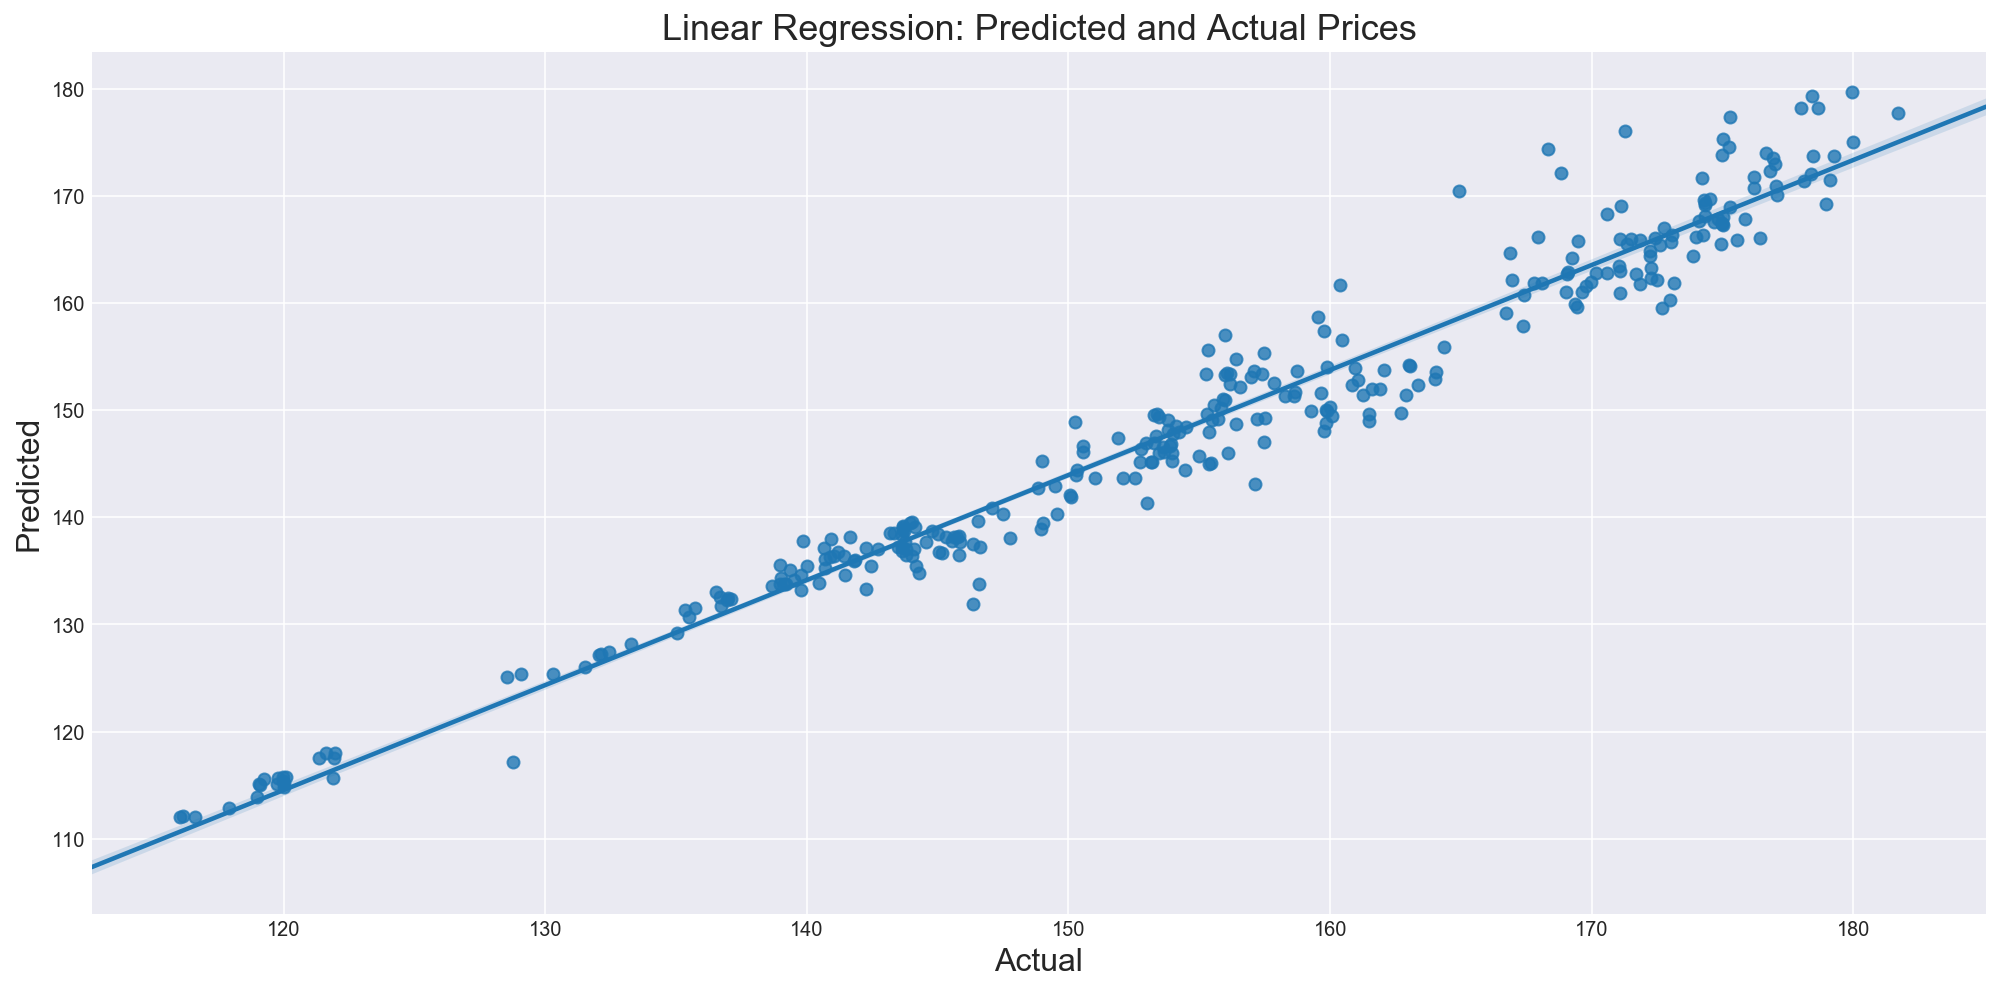

In [16]:
lr = linear_model(X_train_sc, y_train, X_test_sc, y_test)

### Taking a Look at the Coefficients: 

In [17]:
coef_weights = pd.DataFrame(lr.coef_, index=X_train.columns, columns=['weight'])

In [18]:
coef_weights.sort_values('weight').tail()

,weight
Adj_Open_Mid_EMA,4448.256641
Open_Mid_EMA,4746.892090
Adj_Low_Long_EMA,8441.938805
Adj_High_Long_EMA,12018.195965
Adj_Close_Mid_EMA,13645.727434


-----
<a class="anchor" id="PCA"></a>
# Decomposing Signal Components with Principal Component Analysis (PCA):

### Creating a Function to Instantiate the PCA Decomposition:

Sometimes, centering and scaling the features independently is not enough, since a downstream model can further make some assumption on the linear independence of the features.

To address this issue, **Principal Component Analysis** (PCA) is used to decompose signal components.

- **Principal Component Analysis**: reduces linear dimensionality using Singular Value Decomposition (SVD) of the data to project it to a lower dimensional space.

In [19]:
def pca_decomposition(X_train, X_test, num_components):
    """
    Returns a fitted and transformed X_train and a transformed X_test using Principal Components Analysis from SK-Learn.
    
    Parameters
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes the variable assigned to the X variable of your training set, whether scaled or not. 
        
    X_test : var
        Passes the variable assigned to the X variable of your testing set, whether scaled or not.     
    """
    # Instatiating SK-Learns PCA.
    pca = PCA(n_components=num_components, random_state=42)
    # Fitting and Transforming the X_train.
    X_train_pca = pca.fit_transform(X_train)
    # Transforming the X_test
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

### Fitting and Transforming with PCA:

In [20]:
X_train_pca, X_test_pca = pca_decomposition(X_train_sc, X_test_sc, 2)

### Training the PCA Weighted Data on a Linear Regression Model:

#### Evaluation:

- The PCA Decomposition helped increase the OLS Model's score by about 9%! T particular model is fairly close to being overfit. 
- In the graph below, we can see the predicted price is fairly close to the actual price, which is great result!

No handles with labels found to put in legend.


Train Score: 0.9829847772949417
Test Score: 0.9051244925652753
Predictive Mean: 154.95856891488614


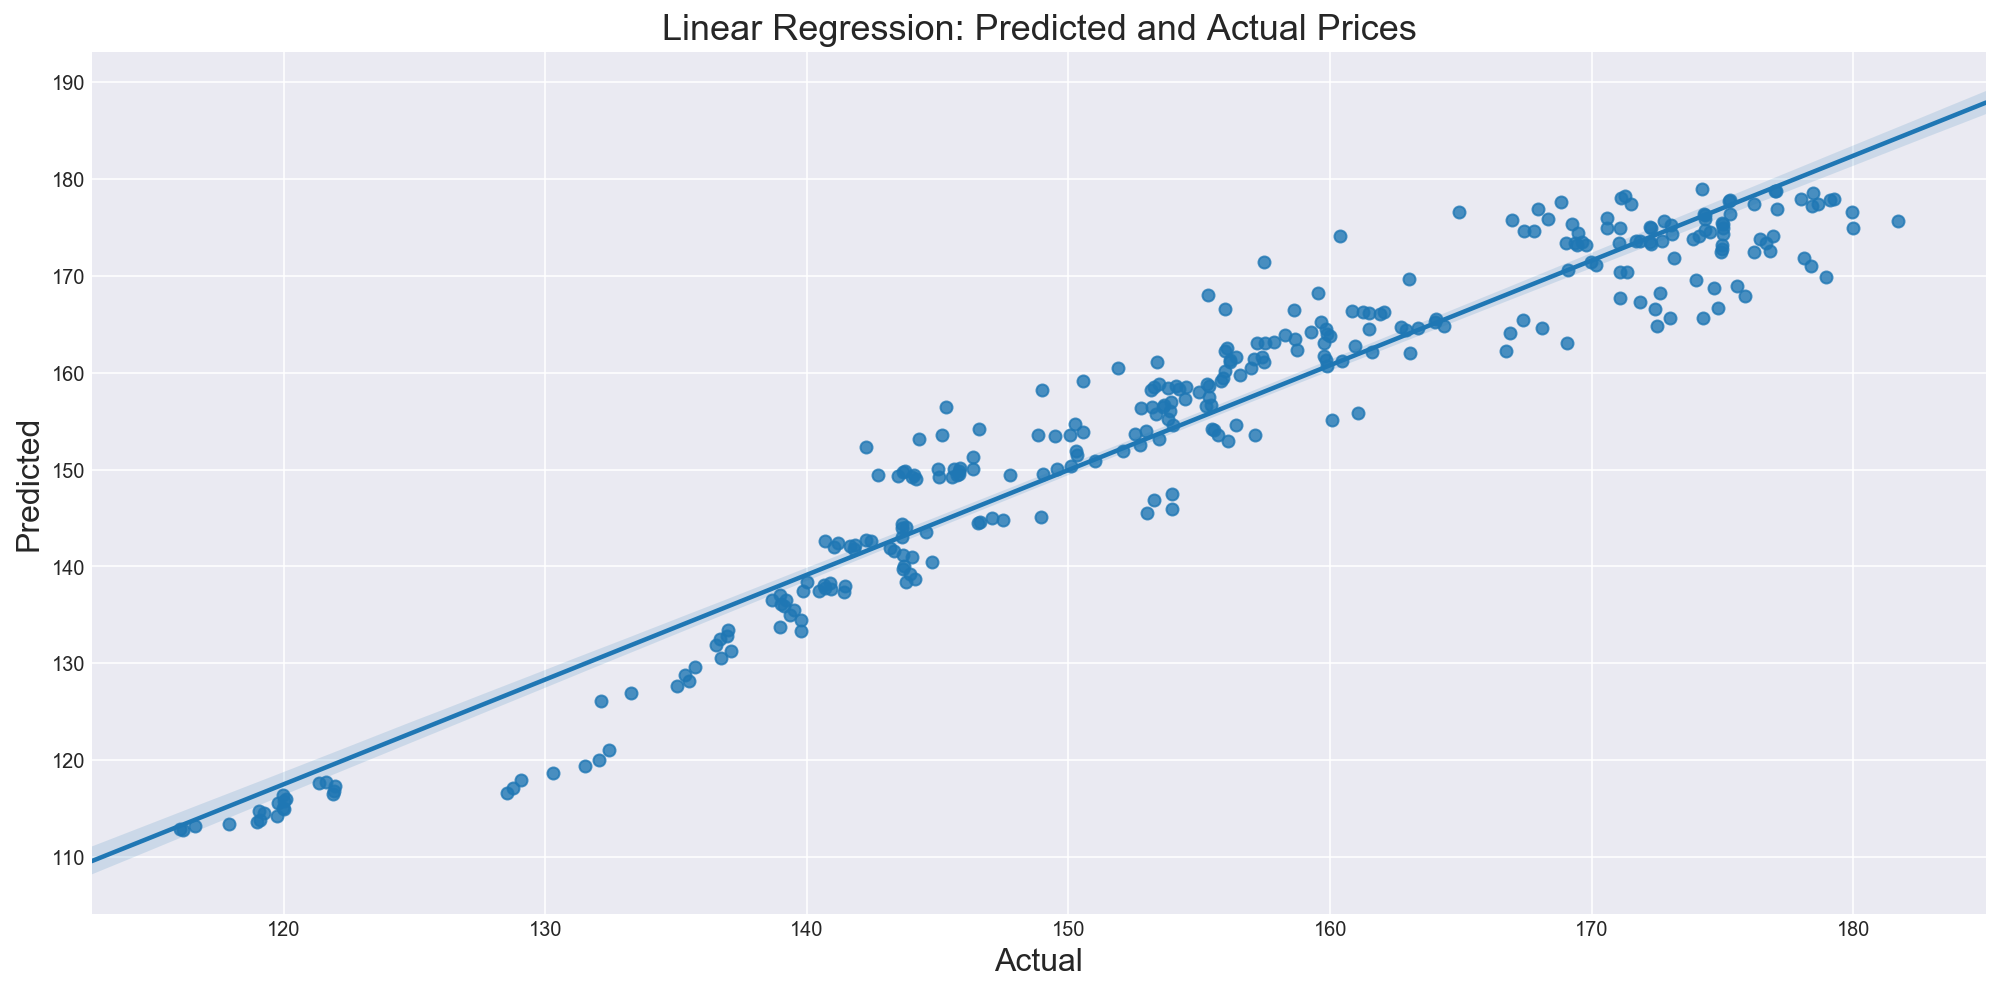

In [21]:
lr_pca = linear_model(X_train_pca, y_train, X_test_pca, y_test)

-----
<a class="anchor" id="Bagging"></a>
# Bagging Regressor Model

### Creating a function to fit a Bagging Regressor Model:

**Bagging Regressor**: is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

Such a meta-estimator can typically be used as a way to reduce the variance by introducing randomization into its construction procedure and then making an ensemble out of it.

Although using a bagging regressor is intuitive, I was curious and wanted to see what randomizing would do. A Gradient Decent Booster like the models below would be intuitive.

In [22]:
def br_model(X_train, y_train, X_test, y_test, base_estimator, n_estimators, max_samples, max_features, bootstrap):
    """
    Returns the fitted model using the Bagging Regressor Model from SK-Learn.
    Prints the Training Score, Testing score, & the average price predicted.
    Renders a visualization of the Predicted and Actual Prices.
    
    Parameters
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes the variable assigned to the X variable of your training set, whether scaled or not. 
   
    y_train : var
        Passes the variable assigned to the y variable of your training set, whether scaled or not. 
    
    X_test : var
        Passes the variable assigned to the X variable of your testing set, whether scaled or not. 
    
    y_test : var
        Passes the variable assigned to the y variable of your testing set, whether scaled or not. 
    
    Bagging Regressor Parameters
    -------------------------------------------------------------------------------------------------------------
    base_estimator : var
        Passes the variable assigned to the scikit learn model.  >> lr = LinearRegression()
    
    n_estimators : int
        Passes the number of estimators to be used in the Bagging Regressor Model.  
    
    max_samples : int
        Passes the maximum number of samples to be used in the Bagging Regressor Model.  
    
    max_features : float
        Passes the maximum number of features to be used in the Bagging Regressor Model.  
    
    bootstrap : boolean
        Passes boolean condition be used in the Bagging Regressor Model. >> True or False     
    """
    
    # Instatiating the Bagging Regresssor.
    br = BaggingRegressor(base_estimator=base_estimator, n_estimators=n_estimators, 
                          max_samples=max_samples, max_features=max_features, bootstrap=bootstrap, 
                          bootstrap_features=False, n_jobs=3, random_state=42)
    # Fitting the Training using the Bagging Regressor.
    br.fit(X_train, y_train)
    # Scoring the Training Set and the Holdout Set.
    train_score = br.score(X_train, y_train)
    # Scoring the Test Set and the Holdout Set.
    test_score = br.score(X_test, y_test)
    # Getting the Average Predictions.
    prediction = br.predict(X_test).mean()
    
    # Plotting the Actual and Predicted Prices.
    plt.figure(figsize=(14,7))
    sns.set_style("darkgrid")
    sns.regplot(y_test, br.predict(X_test_sc))
    # Adding the title and labels.
    plt.title('Bagging Regression: Predicted and Actual Prices', fontsize=18)
    plt.xlabel('Actual', fontsize=16)
    plt.ylabel('Predicted', fontsize=16)
    plt.legend()
    plt.tight_layout()
    
    print(f'Train Score: {train_score}\nTest Score: {test_score}\nPredictive Mean: {prediction}') 
    return br

### Training a Bagging Regressor Model with PCA Decomposition:

#### Evaluation:

- As the previous two models, the bagging regressor model is not entirely overfit. However, the graph demonstrates how poorly the predicted price is compared to the actual price.

No handles with labels found to put in legend.


Train Score: 0.9829380908452983
Test Score: 0.8817486416781686
Predictive Mean: 156.97335732817598


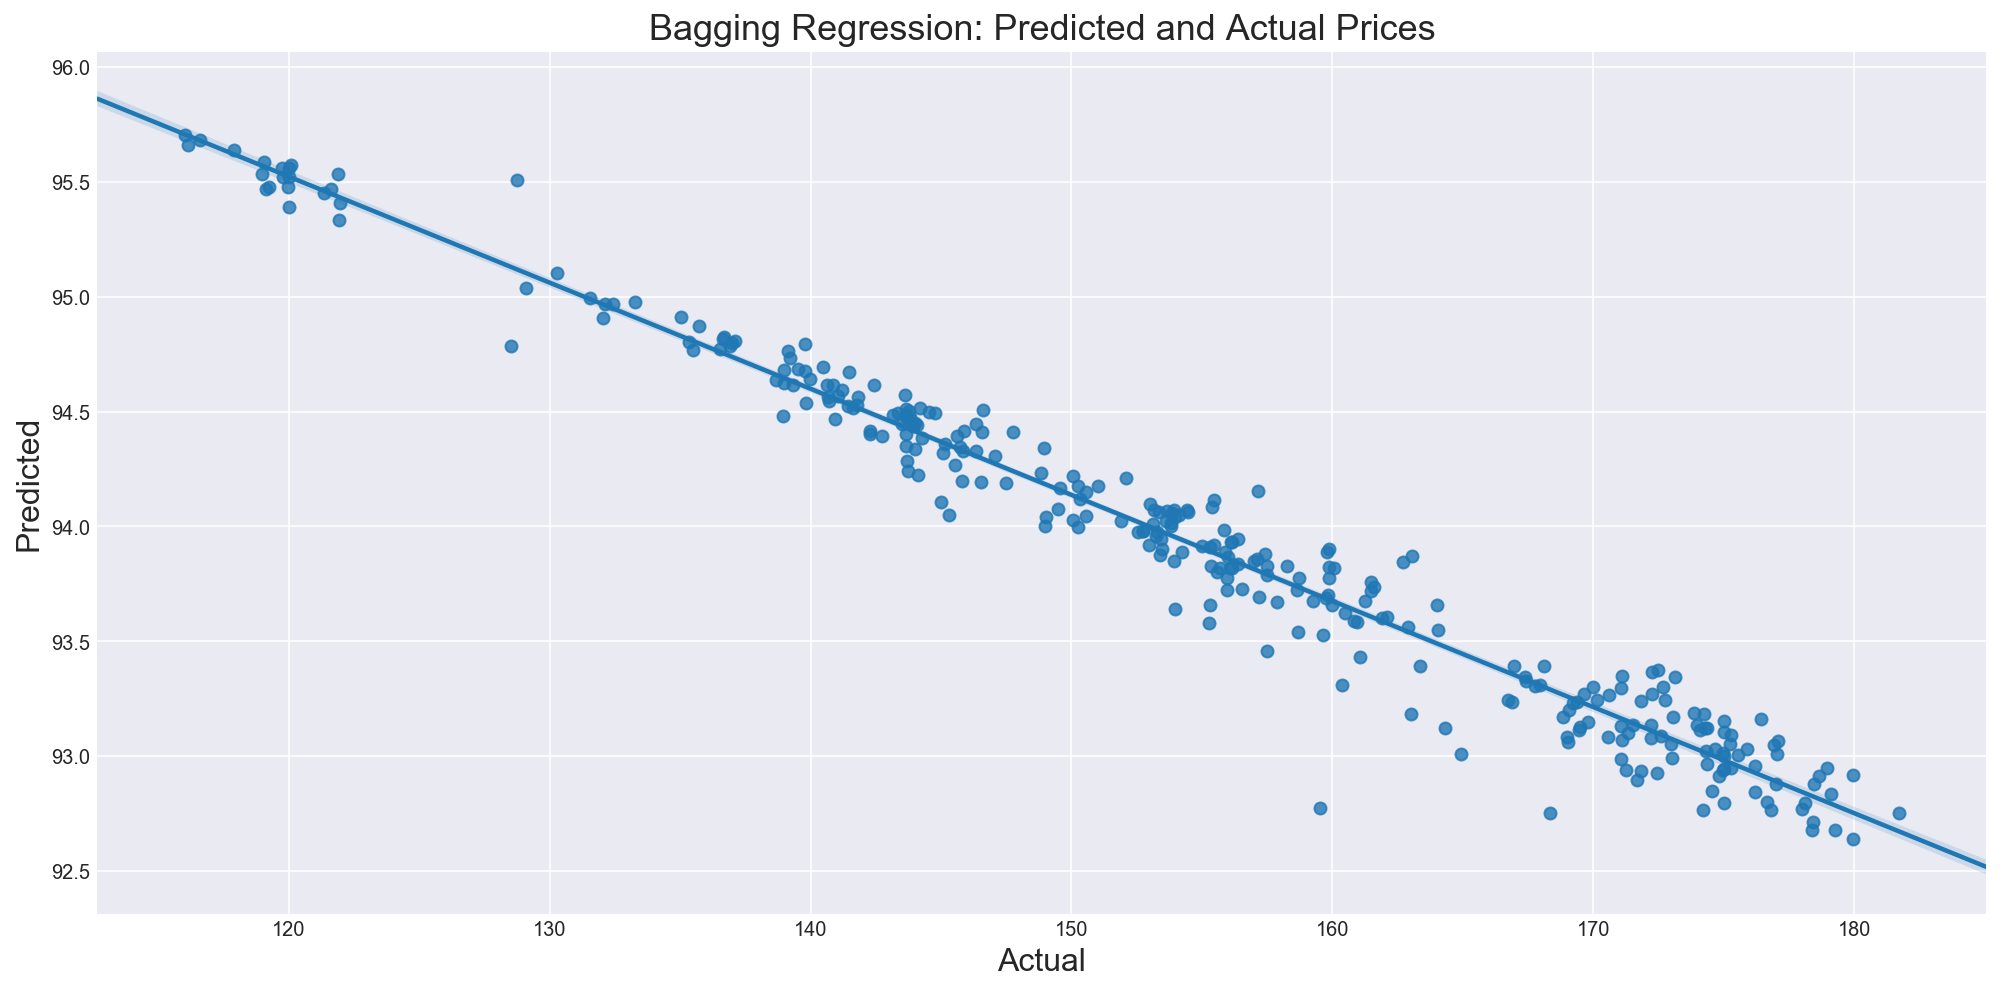

In [23]:
br_pca = br_model(X_train_pca, y_train, X_test_pca, y_test, lr, 
         n_estimators= 15, max_samples=11, max_features=1.0, bootstrap=True)

------
<a class="anchor" id="Adaboost"></a>
# Ada Boost Regression Models

### Creating a Function to Fit an Ada Boost Model:

In [34]:
def ada_boost_model(X_train, y_train, X_test, y_test, base_estimator, n_estimators, learning_rate, loss):
    """
    Returns the fitted model using the Ada Boost Regression Model from SK-Learn.
    Prints the Training Score, Testing score, & the average price predicted.
    Renders a visualization of the Predicted and Actual Prices.
    
    Parameters
    -------------------------------------------------------------------------------------------------------------
    X_train : var
        Passes the variable assigned to the X variable of your training set, whether scaled or not. 
   
    y_train : var
        Passes the variable assigned to the y variable of your training set, whether scaled or not. 
    
    X_test : var
        Passes the variable assigned to the X variable of your testing set, whether scaled or not. 
    
    y_test : var
        Passes the variable assigned to the y variable of your testing set, whether scaled or not. 
    
    Ada Boost Regression Parameters
    -------------------------------------------------------------------------------------------------------------
    base_estimator : var
        Passes the variable assigned to the scikit learn model.  >> lr = LinearRegression()
    
    n_estimators : int
        Passes the number of estimators to be used in the Ada Boost Regression Model.  
    
    max_samples : int
        Passes the maximum number of samples to be used in the Ada Boost Regression Model.  
    
    max_features : float
        Passes the maximum number of features to be used in the Ada Boost Regression Model.  
    
    loss : str
        Passes a string as a loss.
    """
    
    # Instantiating the AdaBoostRegressor.
    booster = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=n_estimators, 
                            learning_rate=learning_rate, loss=loss, random_state=42)
    # Fitting the Training Data using AdaBoost.
    booster.fit(X_train, y_train)
    # Scoring the Training Data.
    train_score = booster.score(X_train, y_train)
    # Scoring the Test Data.
    test_score = booster.score(X_test, y_test)
    # Getting the Average Predictions.
    prediction = booster.predict(X_test).mean()
    
    # Plotting the Predicted and Actual Prices.
    plt.figure(figsize=(14,7))
    sns.set_style("darkgrid")
    sns.regplot(y_test, booster.predict(X_test_sc))
    # Setting up the title and labels.
    plt.title('Linear Regression w/AdaBoost: Predicted and Actual Prices', fontsize=18)
    plt.xlabel('Actual', fontsize=16)
    plt.ylabel('Predicted', fontsize=16)
    plt.legend()
    plt.tight_layout()
    
    print(f'Train Score: {train_score}\nTest Score: {test_score}\nPredictive Mean: {prediction}') 
    return booster

### Scoring the AdaBooster Regressor:

#### Evaluation:

- The AdaBoost regression model is not overfit and does a little better than the simple OLS model. 
- The graph below demonstrates how fair the predicted price of the stock is compared to the actual price.


No handles with labels found to put in legend.


Train Score: 0.9976822280807408
Test Score: 0.8311194906238139
Predictive Mean: 148.88287979219376


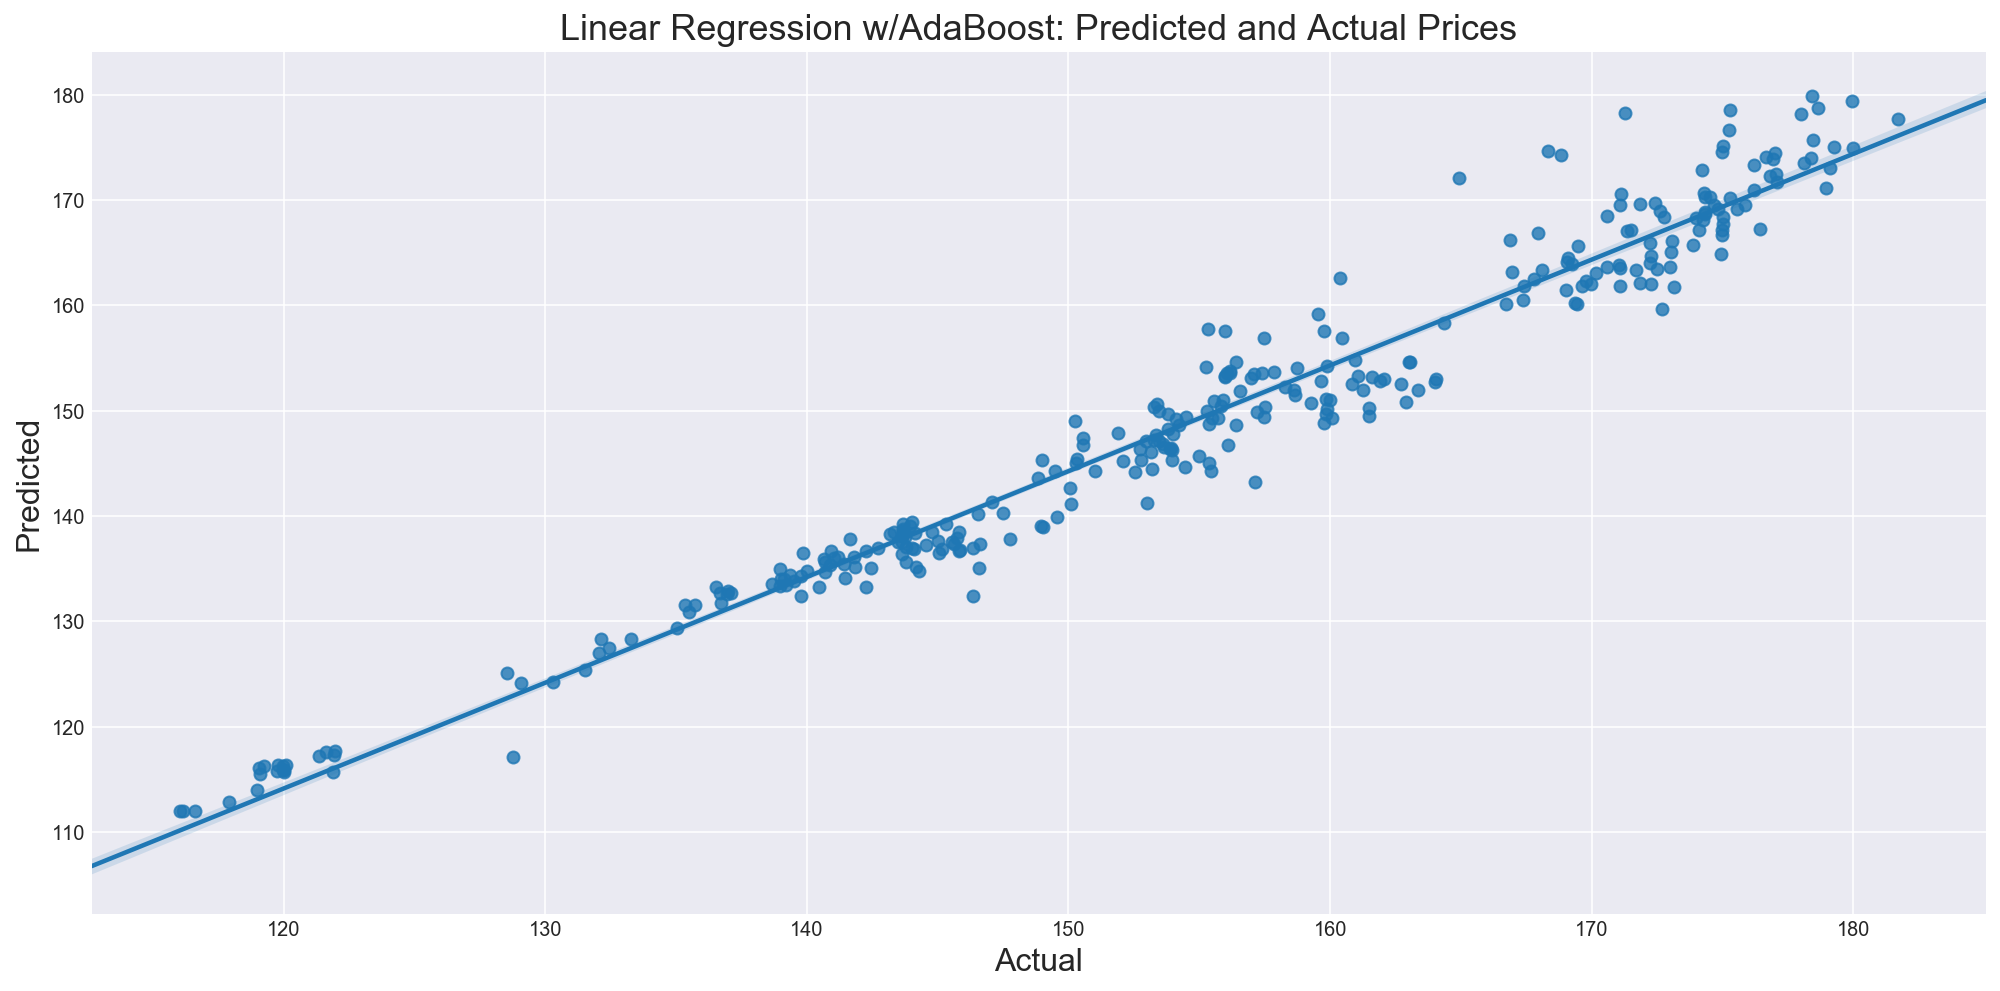

In [25]:
ada_booster = ada_boost_model(X_train_sc, y_train, X_test_sc, y_test, 
                base_estimator=lr, n_estimators=1, learning_rate=1, loss='linear')


<a class="anchor" id="Gridsearch"></a>
## Grid Searching a Gradient Boosting Regression:

- **Gradient Boosting for regression:** is an additive model progressing in a forward step-by-step manner; allowing for the optimization of arbitrary differentiable loss functions. In each stage, a regression tree is fit on the negative gradient of the given loss function.

- **GridSearch:** is an exhaustive search over specified parameter values for an estimator.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### Creating the Pipeline

In [ ]:
pipe = Pipeline([
    ('gbr', GradientBoostingRegressor())
])

### Setting up the Parameters:

In [ ]:
# Types of loss function
loss = ['ls', 'lad']
# Rate in which the model will learn
learning_rate = [x for x in np.linspace(0, 2, 3)]
# Number of estimators
n_estimators = [x for x in range(8, 12, 2)]
# Maximum depth of the tree
max_depth = [x for x in range(1, 3)]
max_depth.append(None)
# Minimum split samples in the tree
min_samples_split = [x for x in range(1, 3)]
# Minimum leaf samples in the tree
min_samples_leaf = [x for x in range(1, 3)]

### Instantiating the Gradient Boosting Regressor:

In [ ]:
GradientBoostingRegressor()

### Parameters Pipeline:

In [ ]:
params = {'gbr__learning_rate' : learning_rate,
          'gbr__n_estimators' : n_estimators,
          'gbr__max_depth': max_depth,
          'gbr__min_samples_split': min_samples_split,
          'gbr__min_samples_leaf': min_samples_leaf}

print(params)

### GridSearching:

In [ ]:
grid = GridSearchCV(pipe, params, n_jobs=3)

### Fitting the GridSearch:

In [ ]:
grid.fit(X_train_sc, y_train)

### Scoring the GridSearch:

In [ ]:
grid.score(X_train_sc, y_train)

### Plotting the GridSearch:

In [ ]:
plt.figure(figsize=(14,7))
sns.set_style("darkgrid")
sns.regplot(y_test, grid.predict(X_test_sc))
plt.title('Random Forest Regression (Gridsearch): Predicted and Actual Prices', fontsize=18)
plt.xlabel('Actual', fontsize=16)
plt.ylabel('Predicted', fontsize=16)
plt.legend()
plt.tight_layout()